In [1]:
%matplotlib widget

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.interpolate as interp

In [13]:
def utc_time_to_seconds(df):
    df["t"] = df["Timestamp (UTC_TIME)"].apply(
        lambda x: (
            datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f") - datetime.datetime.strptime(df["Timestamp (UTC_TIME)"].iloc[0], "%Y-%m-%d %H:%M:%S.%f")).total_seconds()
    )
    return df

def utc_time_to_datetime(df, label="Timestamp (UTC_TIME)"):
    df["datetime"] = df[label].apply(
        lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
    )
    return df

In [14]:
# read timber/CURRENT.csv as pandas dataframe
df_current = pd.read_csv('timber/CURRENT.csv')
df_jaw = pd.read_csv('timber/JAW_position.csv')

In [40]:
df_current = utc_time_to_datetime(df_current)
df_jaw = utc_time_to_datetime(df_jaw)

df_current = utc_time_to_seconds(df_current)
df_jaw = utc_time_to_seconds(df_jaw)

In [16]:
df_current.columns

Index(['Timestamp (UTC_TIME)', 'BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS06',
       'BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_RS06',
       'BLMTI.06R7.B2I10_TCP.C6R7.B2:LOSS_RS06',
       'BLMTI.06R7.B2I10_TCP.D6R7.B2:LOSS_RS06', 'datetime'],
      dtype='object')

In [17]:
df_jaw.columns

Index(['Timestamp (UTC_TIME)', 'TCP.C6L7.B1:MEAS_LVDT_GU',
       'TCP.C6L7.B1:MEAS_LVDT_LU', 'TCP.C6L7.B1:MEAS_LVDT_RU',
       'TCP.C6R7.B2:MEAS_LVDT_GU', 'TCP.C6R7.B2:MEAS_LVDT_LU',
       'TCP.C6R7.B2:MEAS_LVDT_RU', 'TCP.D6L7.B1:MEAS_LVDT_GU',
       'TCP.D6L7.B1:MEAS_LVDT_LU', 'TCP.D6L7.B1:MEAS_LVDT_RU',
       'TCP.D6R7.B2:MEAS_LVDT_GU', 'TCP.D6R7.B2:MEAS_LVDT_LU',
       'TCP.D6R7.B2:MEAS_LVDT_RU', 'datetime'],
      dtype='object')

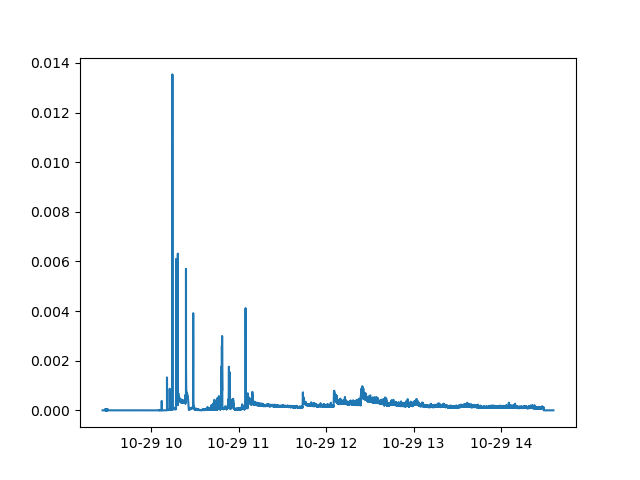

In [18]:
plt.figure()
plt.plot(df_current["datetime"], df_current["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS06"])

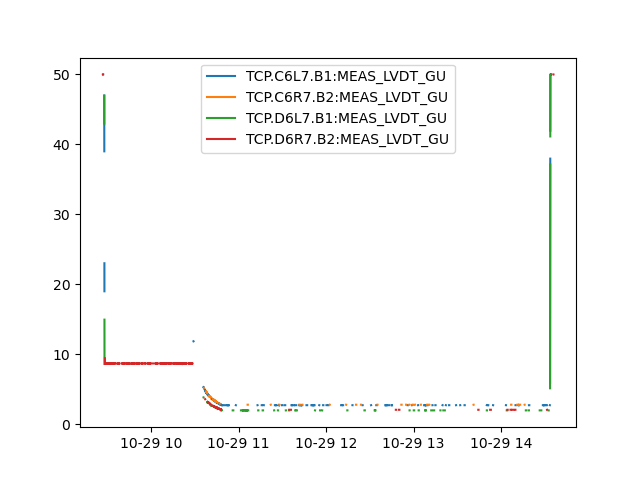

In [46]:
plt.figure()
plt.plot(df_jaw["datetime"], df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"], label="TCP.C6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"], label="TCP.C6R7.B2:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"], label="TCP.D6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["datetime"], df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"], label="TCP.D6R7.B2:MEAS_LVDT_GU")

plt.legend()

In [44]:
coll_b1_c = interp.interp1d(df_jaw[df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.C6L7.B1:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b1_d = interp.interp1d(df_jaw[df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.D6L7.B1:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b2_c = interp.interp1d(df_jaw[df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.C6R7.B2:MEAS_LVDT_GU"].dropna(), bounds_error=False)
coll_b2_d = interp.interp1d(df_jaw[df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"].notna()]["t"], df_jaw["TCP.D6R7.B2:MEAS_LVDT_GU"].dropna(), bounds_error=False)

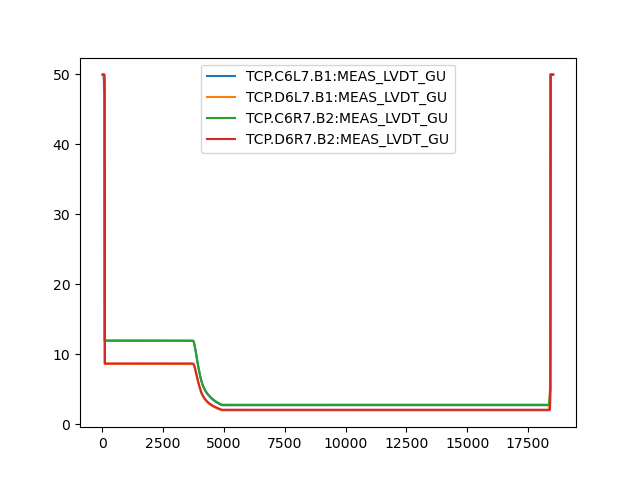

In [48]:
plt.figure()

plt.plot(df_jaw["t"], coll_b1_c(df_jaw["t"]), label="TCP.C6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b1_d(df_jaw["t"]), label="TCP.D6L7.B1:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b2_c(df_jaw["t"]), label="TCP.C6R7.B2:MEAS_LVDT_GU")
plt.plot(df_jaw["t"], coll_b2_d(df_jaw["t"]), label="TCP.D6R7.B2:MEAS_LVDT_GU")

plt.legend()

In [60]:
print("TCP.C6L7.B1:MEAS_LVDT_GU", coll_b1_c(6000) / 2, "mm")
print("TCP.D6L7.B1:MEAS_LVDT_GU", coll_b1_d(6000) / 2, "mm")
print("TCP.C6R7.B2:MEAS_LVDT_GU", coll_b2_c(6000) / 2, "mm")
print("TCP.D6R7.B2:MEAS_LVDT_GU", coll_b2_d(6000) / 2, "mm")

val_b1_c = coll_b1_c(6000) / 2
val_b1_d = coll_b1_d(6000) / 2
val_b2_c = coll_b2_c(6000) / 2
val_b2_d = coll_b2_d(6000) / 2

TCP.C6L7.B1:MEAS_LVDT_GU 1.3454924721886588 mm
TCP.D6L7.B1:MEAS_LVDT_GU 0.97498855 mm
TCP.C6R7.B2:MEAS_LVDT_GU 1.3786586664324387 mm
TCP.D6R7.B2:MEAS_LVDT_GU 1.0174029599135046 mm


In [20]:
df_emittance_b1_h = pd.read_csv('timber/EMITTANCE_B1_H.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b1_v = pd.read_csv('timber/EMITTANCE_B1_V.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b2_h = pd.read_csv('timber/EMITTANCE_B2_H.csv', skiprows=3, names=[str(i) for i in range(3565)])
df_emittance_b2_v = pd.read_csv('timber/EMITTANCE_B2_V.csv', skiprows=3, names=[str(i) for i in range(3565)])

In [21]:
df_emittance_b1_h = utc_time_to_datetime(df_emittance_b1_h, label="0")
df_emittance_b1_v = utc_time_to_datetime(df_emittance_b1_v, label="0")
df_emittance_b2_h = utc_time_to_datetime(df_emittance_b2_h, label="0")
df_emittance_b2_v = utc_time_to_datetime(df_emittance_b2_v, label="0")

In [31]:
print(df_emittance_b1_h["0"].iloc[115])
print(df_emittance_b1_v["0"].iloc[115])
print(df_emittance_b2_h["0"].iloc[75])
print(df_emittance_b2_v["0"].iloc[75])

2018-10-29 11:10:07.553
2018-10-29 11:10:07.553
2018-10-29 11:07:07.962
2018-10-29 11:07:07.962


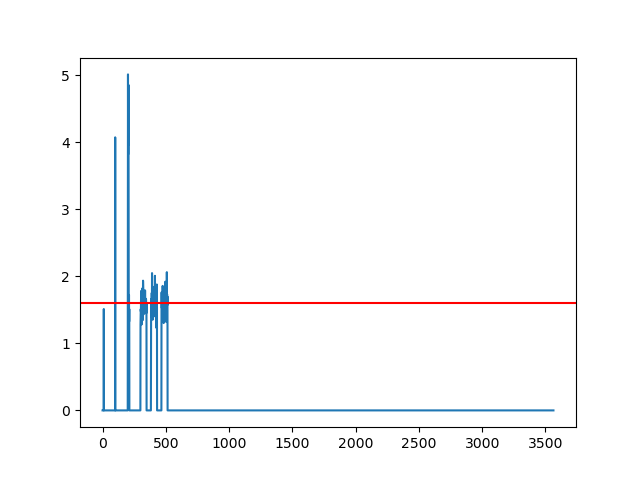

In [54]:
data = df_emittance_b1_h.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b1_h = average

plt.figure()
plt.plot(df_emittance_b1_h.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

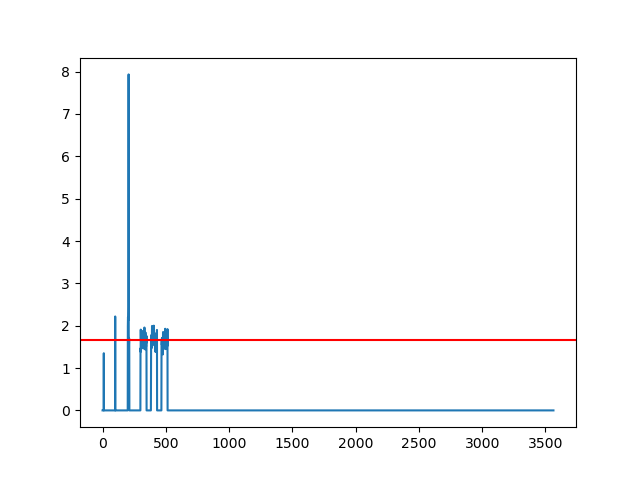

In [55]:
data = df_emittance_b1_v.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b1_v = average

plt.figure()
plt.plot(df_emittance_b1_v.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

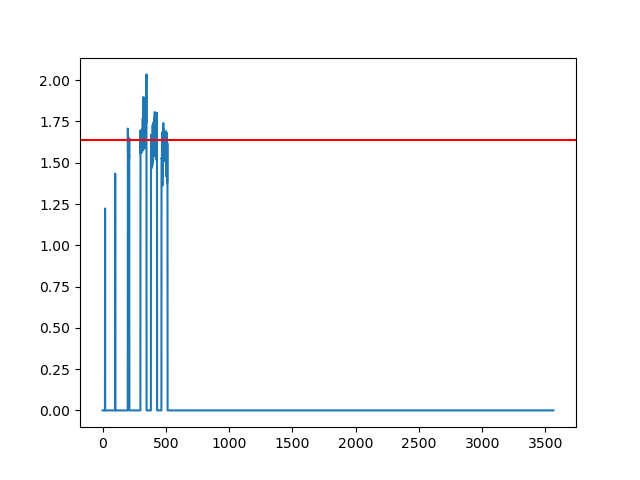

In [56]:
data = df_emittance_b2_h.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b2_h = average

plt.figure()
plt.plot(df_emittance_b2_h.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

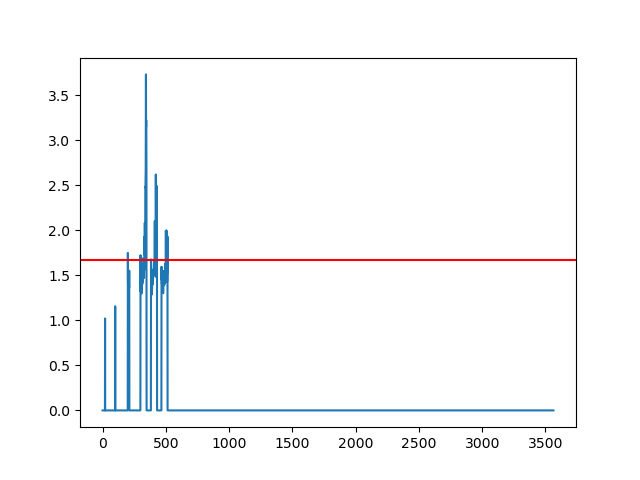

In [57]:
data = df_emittance_b2_v.iloc[115, 1:-1].to_numpy()
data = data[250:750]
average = np.average(data[data > 0.10])
emittance_b2_v = average

plt.figure()
plt.plot(df_emittance_b2_v.iloc[115, 1:-1].to_numpy())
plt.axhline(average, color="red")

In [59]:
print("emittance_b1_h", emittance_b1_h, "um")
print("emittance_b1_v", emittance_b1_v, "um")
print("emittance_b2_h", emittance_b2_h, "um")
print("emittance_b2_v", emittance_b2_v, "um")

emittance_b1_h 1.5985555555555555  um
emittance_b1_v 1.6516805555555554  um
emittance_b2_h 1.6373680555555556  um
emittance_b2_v 1.672833333333334  um


In [61]:
sigma_b1_h = val_b1_c / (0.200 * np.sqrt(emittance_b1_h / 3.5))
sigma_b1_v = val_b1_d / (0.200 * np.sqrt(emittance_b1_v / 3.5))
sigma_b2_h = val_b2_c / (0.200 * np.sqrt(emittance_b2_h / 3.5))
sigma_b2_v = val_b2_d / (0.200 * np.sqrt(emittance_b2_v / 3.5))

print("sigma_b1_h", sigma_b1_h, "$\\sigma$")
print("sigma_b1_v", sigma_b1_v, "$\\sigma$")
print("sigma_b2_h", sigma_b2_h, "$\\sigma$")
print("sigma_b2_v", sigma_b2_v, "$\\sigma$")

sigma_b1_h 9.954545402060425 $\sigma$
sigma_b1_v 7.096439653289289 $\sigma$
sigma_b2_h 10.07830796627749 $\sigma$
sigma_b2_v 7.358184724110533 $\sigma$
